In [1]:
#Data obtained from Kaggle competition

In [2]:
import matplotlib.pyplot as plt 
import cv2

In [3]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

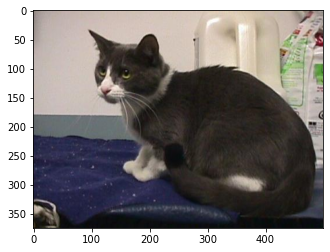

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
type(cat4)

numpy.ndarray

In [7]:
dog5 = cv2.imread('CATS_DOGS/train/DOG/5.jpg')
dog5 = cv2.cvtColor(dog5, cv2.COLOR_BGR2RGB)

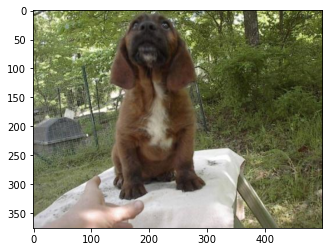

In [8]:
plt.imshow(dog5)

In [9]:
dog5.shape

(376, 500, 3)

In [10]:
#making data more robust, use ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

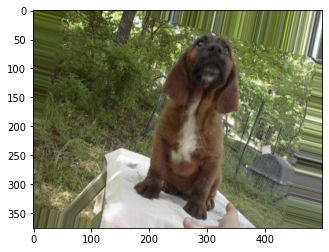

In [12]:
plt.imshow(image_gen.random_transform(dog5))

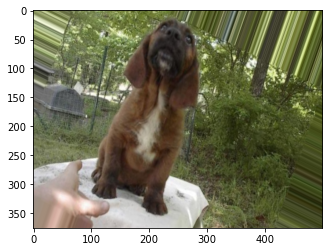

In [13]:
plt.imshow(image_gen.random_transform(dog5))

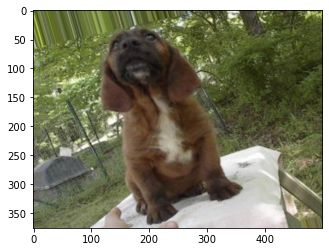

In [14]:
plt.imshow(image_gen.random_transform(dog5))

In [15]:
#getting images from directories

In [17]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [18]:
image_gen.flow_from_directory('CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [19]:
#resize images 

image_shape=(150,150,3)

In [20]:
#creating the model: 

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer,binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [23]:
#training the model 

batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [24]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [27]:
results = model.fit_generator(train_image_gen,epochs=100,
                             steps_per_epoch=150,
                             validation_data=test_image_gen,
                             validation_steps=12)

C:\Users\EXCALI~1\AppData\Local\Temp/ipykernel_17144/4195983130.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=100,


Epoch 1/100
150/150 [==============================] - 58s 380ms/step - loss: 0.6982 - accuracy: 0.5392 - val_loss: 0.6884 - val_accuracy: 0.5104
Epoch 2/100
150/150 [==============================] - 57s 380ms/step - loss: 0.6901 - accuracy: 0.5254 - val_loss: 0.6795 - val_accuracy: 0.5573
Epoch 3/100
150/150 [==============================] - 56s 371ms/step - loss: 0.6867 - accuracy: 0.5733 - val_loss: 0.6855 - val_accuracy: 0.5365
Epoch 4/100
150/150 [==============================] - 56s 370ms/step - loss: 0.6801 - accuracy: 0.5713 - val_loss: 0.6785 - val_accuracy: 0.5990
Epoch 5/100
 15/150 [==>...........................] - ETA: 45s - loss: 0.6852 - accuracy: 0.5208

C:\Users\Excalibur\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 [==============================] - 52s 349ms/step - loss: 0.6749 - accuracy: 0.5779 - val_loss: 0.6557 - val_accuracy: 0.6094
Epoch 6/100
150/150 [==============================] - 51s 338ms/step - loss: 0.6517 - accuracy: 0.6187 - val_loss: 0.6780 - val_accuracy: 0.6146
Epoch 7/100
150/150 [==============================] - 49s 325ms/step - loss: 0.6635 - accuracy: 0.6194 - val_loss: 0.6192 - val_accuracy: 0.6458
Epoch 8/100
150/150 [==============================] - 48s 320ms/step - loss: 0.6473 - accuracy: 0.6283 - val_loss: 0.6241 - val_accuracy: 0.6875
Epoch 9/100
150/150 [==============================] - 47s 315ms/step - loss: 0.6479 - accuracy: 0.6279 - val_loss: 0.6460 - val_accuracy: 0.6250
Epoch 10/100
150/150 [==============================] - 45s 297ms/step - loss: 0.6228 - accuracy: 0.6683 - val_loss: 0.6167 - val_accuracy: 0.6510
Epoch 11/100
150/150 [==============================] - 42s 279ms/step - loss: 0.6267 - accuracy: 0.6479 - val_loss: 0.6136 - val_accur

Epoch 61/100
150/150 [==============================] - 40s 267ms/step - loss: 0.4423 - accuracy: 0.7975 - val_loss: 0.4296 - val_accuracy: 0.7917
Epoch 62/100
150/150 [==============================] - 41s 273ms/step - loss: 0.4579 - accuracy: 0.7896 - val_loss: 0.4945 - val_accuracy: 0.7656
Epoch 63/100
150/150 [==============================] - 40s 268ms/step - loss: 0.4420 - accuracy: 0.7946 - val_loss: 0.4617 - val_accuracy: 0.8021
Epoch 64/100
150/150 [==============================] - 40s 268ms/step - loss: 0.4503 - accuracy: 0.8046 - val_loss: 0.3874 - val_accuracy: 0.8125
Epoch 65/100
150/150 [==============================] - 41s 270ms/step - loss: 0.4352 - accuracy: 0.7842 - val_loss: 0.5257 - val_accuracy: 0.7396
Epoch 66/100
150/150 [==============================] - 40s 268ms/step - loss: 0.4394 - accuracy: 0.7987 - val_loss: 0.5203 - val_accuracy: 0.7344
Epoch 67/100
150/150 [==============================] - 40s 263ms/step - loss: 0.4343 - accuracy: 0.7975 - val_loss: 0

In [29]:
results.history['acc']


KeyError: 'acc'

In [ ]:
plt.plot(results.history['acc'])

In [ ]:
#predicting on test images

In [31]:
from keras.preprocessing import image
import numpy as np

dog_file = 'CATS_DOGS/test/DOG/57.jpg'

dog_img = image.load_img(dog_file, target_size=(150,150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [32]:
prediction_prob = model.predict(dog_img)

from numpy import argmax
predictions = np.argmax(model.predict(dog_img), axis=-1)

NameError: name 'dog_img' is not defined